# Task One

In [34]:
%autosave 5

Autosaving every 5 seconds


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
avo_df = pd.read_csv("https://raw.githubusercontent.com/pathstream-curriculum/Python/master/avocado.csv")

In [37]:
avo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [38]:
print(avo_df.head())
print(avo_df.tail())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [39]:
avo_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [40]:
# avo_df.columns = avo_df.columns.str.replace(" ", "_").str.lower() # this messed up some unit tests

In [41]:
avo_df.Date = pd.to_datetime(avo_df.Date)
avo_df.Date

0       2015-12-27
1       2015-12-20
2       2015-12-13
3       2015-12-06
4       2015-11-29
           ...    
18244   2018-02-04
18245   2018-01-28
18246   2018-01-21
18247   2018-01-14
18248   2018-01-07
Name: Date, Length: 18249, dtype: datetime64[ns]

In [42]:
avo_df_1 = avo_df[avo_df['region'].isin(["Albany", "Boston", "Charlotte", "Louisville", "Spokane"])]

In [43]:
avo_df_1_agg = avo_df_1.groupby("region").agg({"Total Volume": "mean"})

Text(0, 0.5, 'Total Volume Sold')

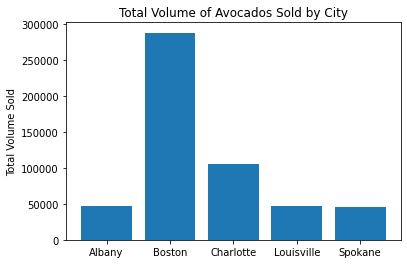

In [44]:
plt.bar(avo_df_1_agg.index, avo_df_1_agg['Total Volume'])
plt.title("Total Volume of Avocados Sold by City")
plt.ylabel("Total Volume Sold")

# Task Three

In [45]:
avo_df_2 = avo_df[avo_df['region'] == 'TotalUS']

In [46]:
avo_df_2 = avo_df_2.sort_values(by= ['Date'], axis=0)

In [47]:
avo_df_2_conv = avo_df_2[avo_df_2['type'] == 'conventional']

Text(0.5, 0, 'Date')

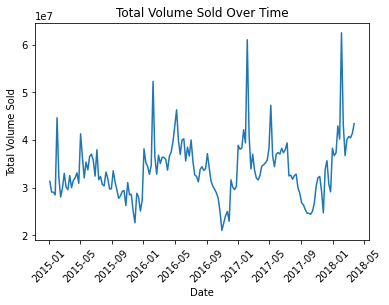

In [48]:
# Create a line plot of Total Volume Sold Over Time
plt.plot(avo_df_2_conv["Date"], avo_df_2_conv['Total Volume'])
plt.xticks(rotation=45)
plt.title("Total Volume Sold Over Time")
plt.ylabel("Total Volume Sold")
plt.xlabel("Date")

# Task Four

In [49]:
avo_df_2_org = avo_df_2[avo_df_2['type'] == 'organic']

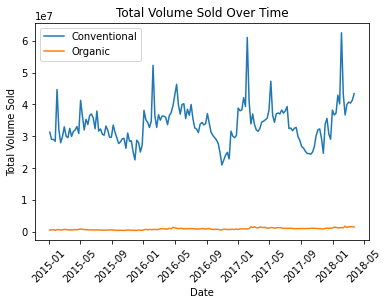

In [52]:
# Lineplot that shows both organic and conventional sales over time
plt.plot(avo_df_2_conv["Date"], avo_df_2_conv['Total Volume'])
plt.plot(avo_df_2_org["Date"], avo_df_2_org['Total Volume'])
plt.xticks(rotation=45)
plt.title("Total Volume Sold Over Time")
plt.ylabel("Total Volume Sold")
plt.xlabel("Date")
plt.legend(["Conventional", "Organic"])

# Task Five

Text(0, 0.5, 'Total Volume Sold')

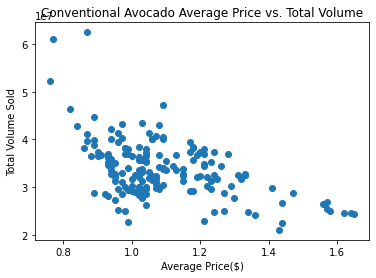

In [53]:
plt.scatter(avo_df_2_conv['AveragePrice'], avo_df_2_conv['Total Volume'])
plt.title("Conventional Avocado Average Price vs. Total Volume")
plt.xlabel("Average Price($)")
plt.ylabel("Total Volume Sold")

Text(0, 0.5, 'Total Volume Sold')

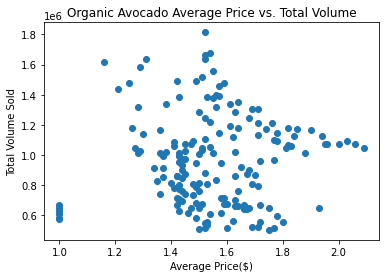

In [54]:
plt.scatter(avo_df_2_org['AveragePrice'], avo_df_2_org['Total Volume'])
plt.title("Organic Avocado Average Price vs. Total Volume")
plt.xlabel("Average Price($)")
plt.ylabel("Total Volume Sold")

# Task Six

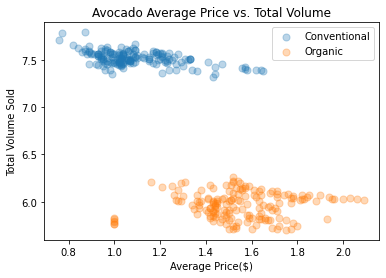

In [58]:
plt.scatter(avo_df_2_conv['AveragePrice'], np.log10(avo_df_2_conv['Total Volume']), s=50, alpha=0.3)
plt.scatter(avo_df_2_org['AveragePrice'], np.log10(avo_df_2_org['Total Volume']), s=50, alpha=0.3)
plt.title("Avocado Average Price vs. Total Volume")
plt.xlabel("Average Price($)")
plt.ylabel("Total Volume Sold")
plt.legend(["Conventional", "Organic"])